In [1]:
import numpy as np

In [2]:
from neural_models.utils import *

In [8]:
import json

bilstm_val_con = np.load("datasets/bilstm_consistent_preds.npy")
bilstm_val_incon = np.load("datasets/bilstm_inconsistent_preds.npy")

bilstm_real_con = np.load("datasets/bilstm_consistent_real_preds.npy")
bilstm_real_incon = np.load("datasets/bilstm_inconsistent_real_preds.npy")

codet5_val_con = np.load("datasets/codet5_consistent_preds.npy")
codet5_val_incon = np.load("datasets/codet5_inconsistent_preds.npy")

codet5_real_con = np.load("datasets/codet5_consistent_real_preds.npy")
codet5_real_incon = np.load("datasets/codet5_inconsistent_real_preds.npy")

#triplet_val_preds = np.load("testsets/triplet_val_preds.npy")

triplet_incon_preds = np.load("datasets/triplet_inconsistent_preds.npy")
triplet_con_preds = np.load("datasets/triplet_consistent_preds.npy")

triplet_real_incon_preds = np.load("datasets/triplet_inconsistent_real_preds.npy")
triplet_real_con_preds = np.load("datasets/triplet_consistent_real_preds.npy")

#triplet_val_preds = (triplet_val_preds[0].ravel(), triplet_val_preds[1].ravel())

In [13]:
n_t = 200

cls_fprs_bilstm, cls_tprs_bilstm = calc_tpr_fpr(bilstm_val_con, bilstm_val_incon,lambda x, t: 0. if x < t else 1., n_tresh=n_t, max_t = 1.)
cls_fprs_bilstm_r, cls_tprs_bilstm_r = calc_tpr_fpr(bilstm_real_con, bilstm_real_incon,lambda x, t: 0. if x < t else 1., n_tresh=n_t, max_t = 1.)

cls_fprs_codet5, cls_tprs_codet5 = calc_tpr_fpr(codet5_val_con, codet5_val_incon,lambda x, t: 0. if x < t else 1., n_tresh=n_t, max_t = 1.)

max_t = max(max(triplet_real_con_preds), max(triplet_real_incon_preds))
val_tri_fprs, val_tri_tprs = calc_tpr_fpr(triplet_con_preds, triplet_incon_preds, treshold_classifier, n_tresh=n_t, max_t = max_t)

max_t = max(max(triplet_real_con_preds), max(triplet_real_incon_preds))
real_tri_fprs, real_tri_tprs = calc_tpr_fpr(triplet_real_con_preds, triplet_real_incon_preds, treshold_classifier, n_tresh=n_t, max_t = max_t)

cls_fprs_codet5, cls_tprs_codet5 = calc_tpr_fpr(codet5_val_con, codet5_val_incon,lambda x, t: 0. if x < t else 1., n_tresh=n_t, max_t = 1.)
cls_fprs_codet5_r, cls_tprs_codet5_r = calc_tpr_fpr(codet5_real_con, codet5_real_incon,lambda x, t: 0. if x < t else 1., n_tresh=n_t, max_t = 1.)

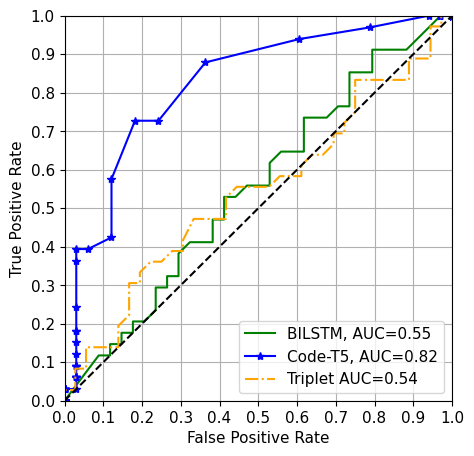

In [14]:
fprs_tprs_bilstm = [(cls_fprs_bilstm_r, cls_tprs_bilstm_r), ([], []),([], []), ([], []), ([], [])]
fprs_tprs_codet5 = [(cls_fprs_codet5_r, cls_tprs_codet5_r), ([], []), ([], []), ([], []), ([], [])]
fprs_tprs_triplet = [(real_tri_fprs, real_tri_tprs), ([], []), ([], []), ([], []), ([], [])]
labels = (['BILSTM, AUC='+str(round(metrics.auc(cls_fprs_bilstm_r, cls_tprs_bilstm_r),2)), None, None, None, None], 
          ['Code-T5, AUC='+str(round(metrics.auc(cls_fprs_codet5_r, cls_tprs_codet5_r),2)), None,None, None, None],
         ['Triplet AUC='+str(round(metrics.auc(real_tri_fprs, real_tri_tprs),2))])
plot_roc_curve_all_strategies(fprs_tprs_bilstm, fprs_tprs_codet5, fprs_tprs_triplet, labels)

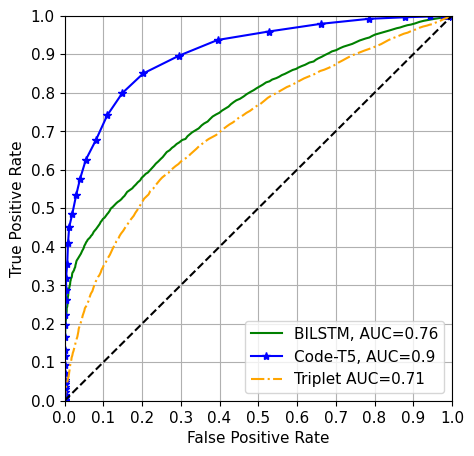

In [15]:
fprs_tprs_bilstm = [(cls_fprs_bilstm, cls_tprs_bilstm), ([], []),([], []), ([], []), ([], [])]
fprs_tprs_codet5 = [(cls_fprs_codet5, cls_tprs_codet5), ([], []), ([], []), ([], []), ([], [])]
fprs_tprs_triplet = [(val_tri_fprs, val_tri_tprs), ([], []), ([], []), ([], []), ([], [])]
labels = (['BILSTM, AUC='+str(round(metrics.auc(cls_fprs_bilstm, cls_tprs_bilstm),2)), None, None, None, None], 
          ['Code-T5, AUC='+str(round(metrics.auc(cls_fprs_codet5, cls_tprs_codet5),2)), None,None, None, None],
         ['Triplet AUC='+str(round(metrics.auc(val_tri_fprs, val_tri_tprs),2))])
plot_roc_curve_all_strategies(fprs_tprs_bilstm, fprs_tprs_codet5, fprs_tprs_triplet, labels)

In [7]:
from sklearn import metrics

metrics.auc(fi_tri_fprs, fi_tri_tprs)

NameError: name 'fi_tri_fprs' is not defined